In [1]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pickle
import cv2
import os

In [2]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [14]:
# 1. Load the TFLite model:
tflite_model_V1_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/saved_models/groundnut_disease_model.tflite"  # Correct path
interpreter_1 = tf.lite.Interpreter(model_path=tflite_model_V1_path)
interpreter_1.allocate_tensors()

# Get input and output details:
input_details = interpreter_1.get_input_details()
output_details = interpreter_1.get_output_details()

In [15]:
# 1. Load the TFLite model:
tflite_model_v2_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/saved_models/groundnut_disease_model_v2.tflite"  # Correct path
interpreter_2 = tf.lite.Interpreter(model_path=tflite_model_v2_path)
interpreter_2.allocate_tensors()

# Get input and output details:
input_details = interpreter_2.get_input_details()
output_details = interpreter_2.get_output_details()

In [20]:
# Get details about the tensors:
for detail in interpreter_1.get_tensor_details():
    # print(f"Tensor Name: {detail['name']}")
    # print(f"Tensor Type: {detail['dtype']}")
    print(f"Tensor Shape: {detail['shape']}")
    print("-" * 20)

Tensor Shape: [  1 224 224   3]
--------------------
Tensor Shape: [128]
--------------------
Tensor Shape: [64]
--------------------
Tensor Shape: [128   3   3  64]
--------------------
Tensor Shape: [64  3  3 32]
--------------------
Tensor Shape: [  5 128]
--------------------
Tensor Shape: [  128 86528]
--------------------
Tensor Shape: [128]
--------------------
Tensor Shape: [5]
--------------------
Tensor Shape: [2]
--------------------
Tensor Shape: [32  3  3  3]
--------------------
Tensor Shape: [32]
--------------------
Tensor Shape: [  1 222 222  32]
--------------------
Tensor Shape: [  1 111 111  32]
--------------------
Tensor Shape: [  1 109 109  64]
--------------------
Tensor Shape: [ 1 54 54 64]
--------------------
Tensor Shape: [  1  52  52 128]
--------------------
Tensor Shape: [  1  26  26 128]
--------------------
Tensor Shape: [    1 86528]
--------------------
Tensor Shape: [  1 128]
--------------------
Tensor Shape: [1 5]
--------------------
Tensor Shape:

In [21]:
# Get details about the tensors:
for detail in interpreter_2.get_tensor_details():
    # print(f"Tensor Name: {detail['name']}")
    # print(f"Tensor Type: {detail['dtype']}")
    print(f"Tensor Shape: {detail['shape']}")
    print("-" * 20)

Tensor Shape: [  1 224 224   3]
--------------------
Tensor Shape: [32]
--------------------
Tensor Shape: [32  3  3  3]
--------------------
Tensor Shape: [2]
--------------------
Tensor Shape: [5]
--------------------
Tensor Shape: [128]
--------------------
Tensor Shape: [  5 128]
--------------------
Tensor Shape: [128]
--------------------
Tensor Shape: [64]
--------------------
Tensor Shape: [128   3   3  64]
--------------------
Tensor Shape: [64  3  3 32]
--------------------
Tensor Shape: [  128 86528]
--------------------
Tensor Shape: [  1 222 222  32]
--------------------
Tensor Shape: [  1 111 111  32]
--------------------
Tensor Shape: [  1 109 109  64]
--------------------
Tensor Shape: [ 1 54 54 64]
--------------------
Tensor Shape: [  1  52  52 128]
--------------------
Tensor Shape: [  1  26  26 128]
--------------------
Tensor Shape: [    1 86528]
--------------------
Tensor Shape: [  1 128]
--------------------
Tensor Shape: [1 5]
--------------------
Tensor Shape:

In [36]:
best_model_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/saved_models/93acc_da_groundnut_disease_model.keras"
keras_model_size = os.path.getsize(best_model_path)
keras_model_size_kb = keras_model_size / 1024
keras_model_size_mb = keras_model_size_kb / 1024
print(f"Keras Model Size: {keras_model_size_mb:.2f} MB")

Keras Model Size: 127.87 MB


In [34]:
import os

tflite_model_V1_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/saved_models/groundnut_disease_model.tflite"
model_size = os.path.getsize(tflite_model_V1_path)  # Size in bytes
# print(f"Original Model Size: {model_size} bytes")

# For size in kilobytes:
model_size_kb = model_size / 1024
# print(f"Original Model Size: {model_size_kb:.2f} KB")

# For size in megabytes:
model_size_mb = model_size_kb / 1024
print(f"Original Model Size: {model_size_mb:.2f} MB")

tflite_model_V2_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/saved_models/groundnut_disease_model_v2.tflite"
model_size = os.path.getsize(tflite_model_V2_path)  # Size in bytes
# print(f"Quanttized Model Size: {model_size} bytes")

# For size in kilobytes:
model_size_kb = model_size / 1024
# print(f"Quanttized Model Size: {model_size_kb:.2f} KB")

# For size in megabytes:
model_size_mb = model_size_kb / 1024
print(f"Quanttized Model Size: {model_size_mb:.2f} MB")

Original Model Size: 42.61 MB
Quanttized Model Size: 10.66 MB


In [4]:
# 2. preprocess the image
def preprocess_image(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))

    original_shape = img.shape
    image_2d = img.reshape(-1, 3)
    scaler = MinMaxScaler(feature_range=(0, 1))
    normalized_2d = scaler.fit_transform(image_2d)
    normalized_image = normalized_2d.reshape(original_shape)
    normalized_image = np.expand_dims(normalized_image, axis=0)
    return normalized_image

In [5]:
# 3. Load the Label Encoder or Label Mapping:

le_load_path = "/content/drive/MyDrive//Projects/Plant Disease Prediction/saved_models/93acc_label_mapping.pkl"

try:
    with open(le_load_path, "rb") as f:
        # If you saved the mapping:
        loaded_mapping = pickle.load(f)
        print("Loaded Mapping:", loaded_mapping)

        # If you saved the whole encoder:
        # loaded_encoder = pickle.load(f)
        # print("Loaded Encoder Classes:", loaded_encoder.classes_)

except FileNotFoundError:
    print(f"Error: Label encoder file not found at {le_load_path}")
    exit()
except Exception as e:
    print(f"An error occurred while loading label encoder: {e}")
    exit()

Loaded Mapping: ['ALTERNARIA LEAF SPOT' 'HEALTHY' 'LEAF SPOT (EARLY AND LATE)' 'ROSETTE'
 'RUST']


In [25]:
def display_image_matplotlib(image_path, image_title):
    try:
        img = mpimg.imread(image_path)
        plt.imshow(img)
        plt.axis('off')  # Hide axes (optional)
        plt.title(image_title) # Add a title (optional)
        plt.show()
        return True #Return True if the image was displayed successfully
    except FileNotFoundError:
        print(f"Error: Image not found at {image_path}")
        return False #Return False if the image was not found
    except Exception as e:
        print(f"An error occurred: {e}")
        return False #Return False if any other error occurred


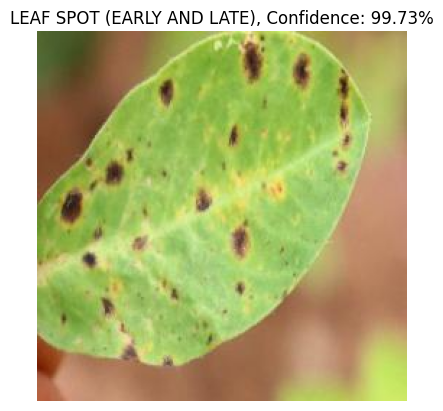

True

In [31]:
# 4. Prediction using TFLite model:

img_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/Groundnut_Leaf_dataset/test/late_leaf_spot_1/dr_4_9915.jpg"
# img_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/Groundnut_Leaf_dataset/test/rust_1/IMG_9015.jpg"
# img_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/Groundnut_Leaf_dataset/train/nutrition_deficiency_1/35_1.jpg"
# img_path = "/content/drive/MyDrive/Projects/Plant Disease Prediction/Groundnut_Leaf_dataset/test/healthy_leaf_1/dr_4_1013.jpg"

preprocessed_image = preprocess_image(img_path)

if preprocessed_image is None:
    exit()
preprocessed_image = preprocessed_image.astype(np.float32)  # Convert to FLOAT32

# Run inference:
interpreter_2.set_tensor(input_details[0]['index'], preprocessed_image)
interpreter_2.invoke()

# Get the output tensor:
output_data = interpreter_2.get_tensor(output_details[0]['index'])

# Process the output (probabilities):
probabilities = output_data[0] #Assuming it is the first output

predicted_class = np.argmax(probabilities)
confidence = np.max(probabilities)

predicted_label = loaded_mapping[predicted_class] #Use loaded mapping
# predicted_label = loaded_encoder.inverse_transform([predicted_class])[0]
result = (f"{predicted_label}, Confidence: {confidence * 100:.2f}%")
display_image_matplotlib(img_path, result)